### Problem (a)

In [1]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics','rec.autos']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
def get_Number(fileName):
    count_vect = CountVectorizer()
    categories = [fileName]
    comp_graphic_train = fetch_20newsgroups(subset='train', categories=categories)
    comp_graphics_number = count_vect.fit_transform(comp_graphic_train.data)
    #print("(number of documents, number of features) = (%s, %s) " % comp_graphics_number.shape)
    [r,v] = comp_graphics_number.shape
    return r

comp_graphics_number = get_Number('comp.graphics')
comp_os_mswindows_misc_number = get_Number('comp.os.ms-windows.misc')
comp_sys_ibm_pc_hardware_number = get_Number('comp.sys.ibm.pc.hardware')
comp_sys_mac_hardware_number = get_Number('comp.sys.mac.hardware')
rec_autos_number = get_Number('rec.autos')
rec_motorcycles_number = get_Number('rec.motorcycles')
rec_sport_baseball_number = get_Number('rec.sport.baseball')
rec_sport_hockey_number = get_Number('rec.sport.hockey')

In [3]:
Number_Computer_technology = comp_graphics_number+comp_os_mswindows_misc_number+comp_sys_ibm_pc_hardware_number+comp_sys_mac_hardware_number
Number_Recreational_activity = rec_autos_number+rec_motorcycles_number+rec_sport_baseball_number+rec_sport_hockey_number

print("Number of class is = %s" % Number_Computer_technology)
print("Number of class is = %s" % Number_Recreational_activity)

import numpy as np
import matplotlib.pyplot as plt

n_groups = 8

document_number = (comp_graphics_number, comp_os_mswindows_misc_number, comp_sys_ibm_pc_hardware_number, comp_sys_mac_hardware_number, rec_autos_number, rec_motorcycles_number, rec_sport_baseball_number, rec_sport_hockey_number)
# fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4

Number of class is = 2343
Number of class is = 2389


In [4]:
print document_number


(584, 591, 590, 578, 594, 598, 597, 600)


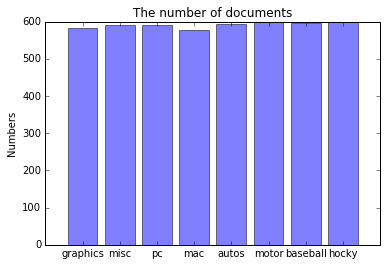

In [5]:
objects = ('graphics', 'misc', 'pc', 'mac', 'autos', 'motor','baseball','hocky')
y_pos = np.arange(len(objects))

%matplotlib inline
plt.figure()
plt.bar(y_pos, document_number, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Numbers')
plt.title('The number of documents')
plt.show()


### Problem (b)

We need to use the command "nltk.download()". And choose the "Models" option. Download the "Punkt" package which is the requirement of this problem.

In [6]:
from sklearn.feature_extraction import text
import string
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
stop_words = text.ENGLISH_STOP_WORDS.union(string.punctuation)

In [7]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42, remove = ('headers','footers','quotes'))
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42, remove = ('headers','footers','quotes'))


In [8]:
#twenty_train.target_names
#3,4,6,15

The converse mapping from feature name to column index is stored in the vocabulary_ attribute of the vectorizer:

In [9]:
import nltk
import re
import string
#import regex as re
# stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def remove_punctuation(text):
    return re.sub(r'[^A-Za-z]', " ", text)
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens =[word for sent in nltk.sent_tokenize(remove_punctuation(text)) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]{2,}', token):
            filtered_tokens.append(token)         
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [10]:
__stemmer = nltk.stem.LancasterStemmer()
__words_only = re.compile("^[A-Za-z]*$")
def punctuation_cleaner(s):
    if s not in string.punctuation:
        return True
    return False
def stop_word_cleaner(s):
    if s not in feature_extraction.text.ENGLISH_STOP_WORDS:
        return True
    return False
def stem_cleaner(s):
    return __stemmer.stem(s)
def clean_word(s):
    result = ""
    if s is not None:
        for w in nltk.tokenize.word_tokenize(s.lower()):
            if w is not None and stop_word_cleaner(w) and punctuation_cleaner(w) and regex_filter(w):
                result += " " + stem_cleaner(w)
    return result
def regex_filter(s):
    if __words_only.match(s) is not None:
        return True
    return False

In [11]:
from sklearn import feature_extraction
tf_idf = TfidfVectorizer(preprocessor=clean_word, use_idf=True)
tf_idf_data = tf_idf.fit_transform(twenty_train.data)


In [12]:
print tf_idf_data.shape

(11314, 37655)


### Problem (c)

In [13]:
index = list()
length = list()
data = list()
for j in range(20):
    index_temp = list()
    index_temp.append(list(np.where(twenty_train.target == j))[0])
    index.append(index_temp)
    data_temp = list()
    for i in index[j][0]:
        data_temp.append(twenty_train.data[i])
    data.append(data_temp)
    length.append(len(data_temp))

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
data_icf = list()
for j in range(20):
    data_cl = ""
    for i in range(len(data[j])):
        data_cl = data_cl + " " + data[j][i]
    data_icf.append(data_cl)


In [15]:
tf_icf = TfidfVectorizer(preprocessor=clean_word, use_idf=True)
tf_icf_data = tf_icf.fit_transform(data_icf[:])

In [16]:
def max_feature(x,tf_icf):
    ibm_s = sorted(x)
    ibm_s = ibm_s[-10:]
    ibm_index = list()
    for j in range(len(x)):
        if x[j] in ibm_s:
            ibm_index.append(j)
    ibm_features = list()
    for j in ibm_index:
        ibm_features.append(tf_icf.get_feature_names()[j])
    print(ibm_features)


In [17]:
ibm_li = tf_icf_data.toarray()[3]
mac_li = tf_icf_data.toarray()[4]
forsale_li = tf_icf_data.toarray()[6]
christian_li = tf_icf_data.toarray()[15]
max_feature(ibm_li,tf_icf)
max_feature(mac_li,tf_icf)
max_feature(forsale_li,tf_icf)
max_feature(christian_li,tf_icf)

[u'bio', u'card', u'control', u'disk', u'doe', u'driv', u'id', u'problem', u'scsi', u'us']
[u'appl', u'doe', u'driv', u'duo', u'mac', u'monit', u'problem', u'scsi', u'us', u'work']
[u'dos', u'gam', u'includ', u'new', u'off', u'pric', u'sal', u'sel', u'ship', u'us']
[u'believ', u'bibl', u'christ', u'christians', u'church', u'god', u'jes', u'peopl', u'say', u'think']


### Problem (d)

In [18]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

tsv = TruncatedSVD(n_components=50,algorithm='arpack')
X_train_lsi = tsv.fit_transform(tf_idf_data)
print (X_train_lsi.shape)


(11314L, 50L)


### Problem (e)

In [19]:
import numpy as np
categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, remove = ('headers','footers','quotes'))
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42, remove = ('headers','footers','quotes'))
twenty_train_target = np.asarray([ int(x / 4) for x in twenty_train.target])
twenty_test_target = np.asarray([ int(x / 4) for x in twenty_test.target])

In [ ]:
from sklearn.pipeline import Pipeline
def pipelineSet(learning_algo):
    tf_idf = TfidfVectorizer(preprocessor=clean_word, use_idf=True)
    ls = TruncatedSVD(n_components=50, n_iter=5, random_state=25)
    pipeline_list = [('tf_idf', tf_idf), ('svd', ls), ('learning_algo', learning_algo)]
    pipeline = Pipeline(pipeline_list)
    return pipeline


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True, random_state=40, C=10**10)
pipeline_svm = pipelineSet(svm) 
pipeline_svm_fitted = pipeline_svm.fit(twenty_train.data, twenty_train_target)
predicted = pipeline_svm_fitted.predict(twenty_test.data)

In [ ]:
score =pipeline_svm_fitted.score(twenty_test.data, twenty_test_target)
print score

In [ ]:
from sklearn.metrics import roc_curve, auc
#y_score=clf.decision_function(X_test_lsi)
y_score=pipeline_svm_fitted.predict_proba(twenty_test.data)[:, 1]
fpr, tpr, _ = roc_curve(twenty_test_target, y_score)
#average_precision = average_precision_score(twenty_test.target, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

##### Confusion matrix. [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = twenty_test_target
y_pred = predicted
print confusion_matrix(y_true, y_pred)

##### Accuracy [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [ ]:
from sklearn.metrics import accuracy_score
y_true = twenty_test_target
y_pred = predicted
print accuracy_score(y_true, y_pred)

##### Precision [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

In [ ]:
from sklearn.metrics import precision_score
y_true = twenty_test_target
y_pred = predicted
precision_score(y_true, y_pred)  

##### Recall [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

In [ ]:
from sklearn.metrics import recall_score
y_true = twenty_test_target
y_pred = predicted
recall_score(y_true, y_pred) 

##### Recall and precision of your classifier. [Reference Link](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

### Problem (f)

In [ ]:
from sklearn.cross_validation import KFold
kf = KFold(n=len(twenty_train_target), n_folds=5, shuffle=False, random_state=None)
#twenty_train_data = data_process(twenty_train)
#twenty_test_data = data_process(twenty_test)
l = [[0]*7 for i in range(5)]
i=0
j=0
for train_index, test_index in kf:
    X_train_soft=[]
    for index in train_index:
        X_train_soft.append(twenty_train.data[index])
    X_test_soft=[]
    for index1 in test_index:
        X_test_soft.append(twenty_train.data[index1])
    
    for k in [-3, -2, -1, 0, 1, 2, 3]:
        target_train = np.asarray([ int(x / 4) for x in twenty_train.target[train_index]])
        target_test =np.asarray([ int(x / 4) for x in twenty_train.target[test_index]])
        
        ssvm = SVC(C=10**k, kernel='linear', probability=True, random_state=40)
        pipeline_svm = pipelineSet(ssvm) 
        pipeline_svm_fitted = pipeline_svm.fit(X_train_soft, target_train)
        score =pipeline_svm_fitted.score(X_test_soft, target_test)

        #clf_soft = SVC(C=10**k).fit(X_train_soft, target_train)
        #score = clf_soft.score(X_test_soft, target_test)

        l[i][j]=score
        j=j+1
    i=i+1
    j=0


In [ ]:
average_s = list(map(lambda x: (x[0]+x[1]+x[2]+x[3]+x[4])/5, zip(l[0], l[1], l[2], l[3], l[4])))
value = max(average_s)
index=average_s.index(value)
penalty = [-3, -2, -1, 0, 1, 2, 3]
print ('The best penalty value is',10**penalty[index])

In [ ]:
ssvm = SVC(C=10**penalty[index], kernel='linear', probability=True, random_state=40)
pipeline_svm = pipelineSet(ssvm) 
pipeline_svm_fitted = pipeline_svm.fit(twenty_train.data, twenty_train_target)
s =pipeline_svm_fitted.score(twenty_test.data, twenty_test_target)
predicted_soft_pre = pipeline_svm_fitted.predict(twenty_test.data)
print s

##### Confusion matrix. [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = twenty_test_target
y_pred = predicted_soft_pre
print confusion_matrix(y_true, y_pred)

In [ ]:
from sklearn.metrics import roc_curve, auc
#y_score=clf_soft_pre.decision_function(twenty_test_data)
y_score=pipeline_svm_fitted.predict_proba(twenty_test.data)[:, 1]
fpr, tpr, _ = roc_curve(twenty_test_target, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

##### Accuracy [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [ ]:
from sklearn.metrics import accuracy_score
y_true = twenty_test_target
y_pred = predicted_soft_pre
print accuracy_score(y_true, y_pred)

##### Precision [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

In [ ]:
from sklearn.metrics import precision_score
y_true = twenty_test_target
y_pred = predicted_soft_pre
precision_score(y_true, y_pred)  

##### Recall [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

In [ ]:
from sklearn.metrics import recall_score
y_true = twenty_test_target
y_pred = predicted_soft_pre
recall_score(y_true, y_pred) 

##### Recall and precision of your classifier. [Reference Link](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

### Problem (g)

##### Naïve Bayes Algorithm [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_naive_bayes = GaussianNB().fit(X_train_lsi, twenty_train_target)

In [ ]:
pipeline_svm = pipelineSet(GaussianNB()) 
pipeline_svm_fitted = pipeline_svm.fit(twenty_train.data, twenty_train_target)
score =pipeline_svm_fitted.score(twenty_test.data, twenty_test_target)
predicted = pipeline_svm_fitted.predict(twenty_test.data)
print score

##### ROC curve [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

In [ ]:
from sklearn.metrics import roc_curve, auc
#y_score=clf_naive_bayes.predict_proba(X_test_lsi)[:, 1]
y_score=pipeline_svm_fitted.predict_proba(twenty_test.data)[:, 1]

fpr, tpr, _ = roc_curve(twenty_test_target, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

##### Confusion matrix. [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = twenty_test_target
y_pred = predicted
print confusion_matrix(y_true, y_pred)

##### Accuracy [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [ ]:
from sklearn.metrics import accuracy_score
y_true = twenty_test_target
y_pred = predicted
print accuracy_score(y_true, y_pred)

##### Precision [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

In [ ]:
from sklearn.metrics import precision_score
y_true = twenty_test_target
y_pred = predicted
precision_score(y_true, y_pred)  

##### Recall [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

In [ ]:
from sklearn.metrics import recall_score
y_true = twenty_test_target
y_pred = predicted
recall_score(y_true, y_pred) 

##### Recall and precision of your classifier. [Reference Link](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

### Problem (h)

###### logistic regression [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_logistic_regression = LogisticRegression().fit(X_train_lsi, twenty_train_target)

In [ ]:
pipeline_svm = pipelineSet(LogisticRegression(penalty='l2', max_iter=5, random_state=40)) 
pipeline_svm_fitted = pipeline_svm.fit(twenty_train.data, twenty_train_target)
score =pipeline_svm_fitted.score(twenty_test.data, twenty_test_target)
predicted = pipeline_svm_fitted.predict(twenty_test.data)

In [ ]:
#X_test_lsi = data_process(twenty_test)
#predicted = clf_logistic_regression.predict(X_test_lsi)
#print predicted.shape
#score = clf_logistic_regression.score(X_test_lsi, twenty_test_target)
print score

##### ROC curve [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

In [ ]:
from sklearn.metrics import roc_curve, auc
y_score=clf_logistic_regression.predict_proba(X_test_lsi)[:, 1]
y_score=pipeline_svm_fitted.predict_proba(twenty_test.data)[:, 1]

fpr, tpr, _ = roc_curve(twenty_test_target, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

##### Confusion matrix. [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = twenty_test_target
y_pred = predicted
print confusion_matrix(y_true, y_pred)

##### Accuracy [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [ ]:
from sklearn.metrics import accuracy_score
y_true = twenty_test_target
y_pred = predicted
print accuracy_score(y_true, y_pred)

##### Precision [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

In [ ]:
from sklearn.metrics import precision_score
y_true = twenty_test_target
y_pred = predicted
precision_score(y_true, y_pred)  

##### Recall [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

In [ ]:
from sklearn.metrics import recall_score
y_true = twenty_test_target
y_pred = predicted
recall_score(y_true, y_pred) 

### Problem (i)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import metrics
#590,578,
categories_i = ['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']
twenty_train_i = fetch_20newsgroups(subset='train', categories=categories_i, shuffle=True, random_state=6, remove = ('headers','footers','quotes'))
twenty_test_i = fetch_20newsgroups(subset='test', categories=categories_i, shuffle=True, random_state=6, remove = ('headers','footers','quotes'))
twenty_train_i_target = twenty_train_i.target

In [ ]:
#from sklearn.preprocessing import label_binarize
#y = twenty_train_i.target
#y = label_binarize(y, classes=[0, 1, 2, 3])
#n_classes = y.shape[1]
#print n_classes
#y_test = twenty_test_i.target
#y_test = label_binarize(y_test, classes=[0, 1, 2, 3])

##### One VS Rest

In [ ]:
svm_onerest = OneVsRestClassifier(SVC(kernel='linear', probability=True))
pipeline_svm_onerest = pipelineSet(svm_onerest)
pipeline_svm_fitted = pipeline_svm_onerest.fit(twenty_train_i.data, twenty_train_i.target)
predict_i = pipeline_svm_fitted.predict(twenty_test_i.data)
score = pipeline_svm_fitted.score(twenty_test_i.data, twenty_test_i.target)
print score

In [ ]:
print precision_score(twenty_test_i.target, predict_i,average='weighted')  
print recall_score(twenty_test_i.target, predict_i,average='weighted') 
print accuracy_score(twenty_test_i.target, predict_i)
print confusion_matrix(twenty_test_i.target, predict_i)

##### One VS One

In [ ]:
svm_oneone = OneVsOneClassifier(SVC(kernel='linear', probability=True))
pipeline_svm_onerest = pipelineSet(svm_oneone)
pipeline_svm_fitted = pipeline_svm_onerest.fit(twenty_train_i.data, twenty_train_i.target)
predict_i = pipeline_svm_fitted.predict(twenty_test_i.data)
score = pipeline_svm_fitted.score(twenty_test_i.data, twenty_test_i.target)
print score

In [ ]:
print precision_score(twenty_test_i.target, predict_i,average='weighted')  
print recall_score(twenty_test_i.target, predict_i, average='weighted') 
print accuracy_score(twenty_test_i.target, predict_i)
print confusion_matrix(twenty_test_i.target, predict_i)

##### Naive bayes

In [ ]:
pipeline_svm = pipelineSet(GaussianNB()) 
pipeline_svm_fitted = pipeline_svm.fit(twenty_train_i.data, twenty_train_i.target)
score =pipeline_svm_fitted.score(twenty_test_i.data, twenty_test_i.target)
predicted = pipeline_svm_fitted.predict(twenty_test_i.data)

print precision_score(twenty_test_i.target, predicted,average='weighted')  
print recall_score(twenty_test_i.target, predicted,average='weighted') 
print accuracy_score(twenty_test_i.target, predicted)
print confusion_matrix(twenty_test_i.target, predicted)